In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

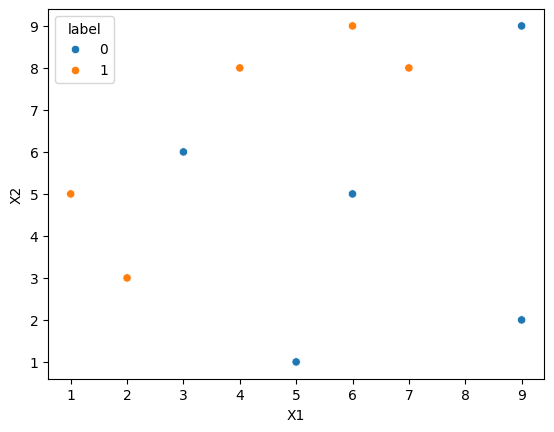

In [5]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [29]:
# Assigning intital weight
df['weights_1'] = 1/df.shape[0]

In [30]:
df

,X1,X2,label,y_pred,weights_1
0,1,5,1,1,0.1
1,2,3,1,1,0.1
2,3,6,0,1,0.1
3,4,8,1,1,0.1
4,5,1,0,0,0.1
5,6,9,1,1,0.1
6,6,5,0,1,0.1
7,7,8,1,1,0.1
8,9,9,0,1,0.1
9,9,2,0,0,0.1


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [33]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [34]:
# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

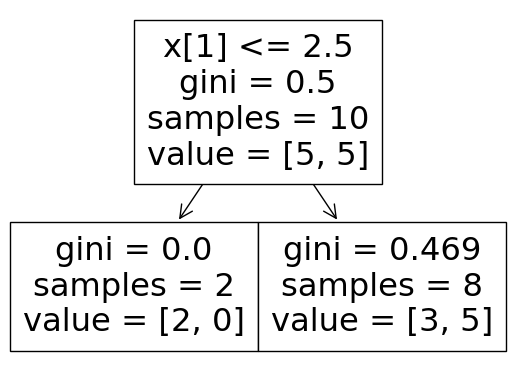

In [35]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

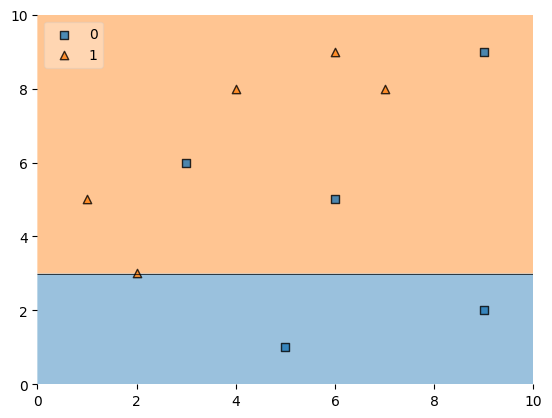

In [36]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [37]:
df['y_pred'] = dt1.predict(X)

In [38]:
df

,X1,X2,label,y_pred,weights_1
0,1,5,1,1,0.1
1,2,3,1,1,0.1
2,3,6,0,1,0.1
3,4,8,1,1,0.1
4,5,1,0,0,0.1
5,6,9,1,1,0.1
6,6,5,0,1,0.1
7,7,8,1,1,0.1
8,9,9,0,1,0.1
9,9,2,0,0,0.1


In [39]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [40]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3) # error = 0.3 because our model is 3 times wrong so
alpha1

0.42364893019360184

In [41]:
# Step 4 - Update weights
def  update_row_weights_1(row,alpha=0.423):

    if row['label'] == row['y_pred']:
        return row['weights_1'] * np.exp(-alpha)
    else:
        return row['weights_1'] * np.exp(alpha)


In [42]:
df['updated_weights_1'] = df.apply(update_row_weights_1,axis=1)

In [43]:
df

,X1,X2,label,y_pred,weights_1,updated_weights_1
0,1,5,1,1,0.1,0.065508
1,2,3,1,1,0.1,0.065508
2,3,6,0,1,0.1,0.152653
3,4,8,1,1,0.1,0.065508
4,5,1,0,0,0.1,0.065508
5,6,9,1,1,0.1,0.065508
6,6,5,0,1,0.1,0.152653
7,7,8,1,1,0.1,0.065508
8,9,9,0,1,0.1,0.152653
9,9,2,0,0,0.1,0.065508


In [45]:
df['updated_weights_1'].sum()

0.9165153319682015

In [46]:
df['nomalized_weights'] = df['updated_weights_1']/df['updated_weights_1'].sum()

In [47]:
df

,X1,X2,label,y_pred,weights_1,updated_weights_1,nomalized_weights
0,1,5,1,1,0.1,0.065508,0.071475
1,2,3,1,1,0.1,0.065508,0.071475
2,3,6,0,1,0.1,0.152653,0.166559
3,4,8,1,1,0.1,0.065508,0.071475
4,5,1,0,0,0.1,0.065508,0.071475
5,6,9,1,1,0.1,0.065508,0.071475
6,6,5,0,1,0.1,0.152653,0.166559
7,7,8,1,1,0.1,0.065508,0.071475
8,9,9,0,1,0.1,0.152653,0.166559
9,9,2,0,0,0.1,0.065508,0.071475


In [48]:
df['nomalized_weights'].sum()

1.0

In [49]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [50]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [52]:
df[['X1','X2','label','weights_1','y_pred','updated_weights_1','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights_1,y_pred,updated_weights_1,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [53]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [54]:
index_values = create_new_dataset(df)

index_values

[6, 9, 2, 3, 4, 5, 8, 8, 0, 3]

In [67]:
second_df = df.iloc[index_values,[0,1,2,3,4]]

In [68]:
second_df

,X1,X2,label,y_pred,weights_1
6,6,5,0,1,0.1
9,9,2,0,0,0.1
2,3,6,0,1,0.1
3,4,8,1,1,0.1
4,5,1,0,0,0.1
5,6,9,1,1,0.1
8,9,9,0,1,0.1
8,9,9,0,1,0.1
0,1,5,1,1,0.1
3,4,8,1,1,0.1


In [69]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [70]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [71]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 4.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.75, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]')]

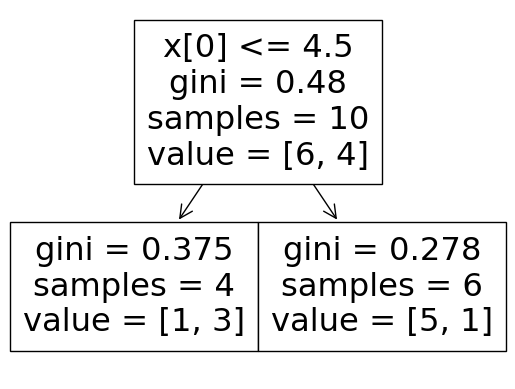

In [72]:
plot_tree(dt2)

<Axes: >

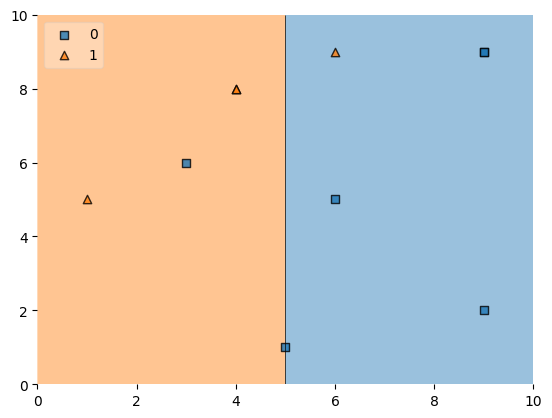

In [73]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [74]:
second_df['y_pred'] = dt2.predict(X)

In [75]:
second_df

,X1,X2,label,y_pred,weights_1
6,6,5,0,0,0.1
9,9,2,0,0,0.1
2,3,6,0,1,0.1
3,4,8,1,1,0.1
4,5,1,0,0,0.1
5,6,9,1,0,0.1
8,9,9,0,0,0.1
8,9,9,0,0,0.1
0,1,5,1,1,0.1
3,4,8,1,1,0.1


In [76]:
alpha2 = calculate_model_weight(0.1)

In [77]:
alpha2

1.0986122886681098

In [78]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights_1'] * np.exp(-alpha)
  else:
    return row['weights_1'] * np.exp(alpha)

In [79]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [ ]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
4,5,1,0,0.1,0,0.033622
2,3,6,0,0.1,1,0.297427
0,1,5,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
9,9,2,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622
0,1,5,1,0.1,1,0.033622


In [80]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [81]:
second_df

,X1,X2,label,y_pred,weights_1,updated_weights,nomalized_weights
6,6,5,0,0,0.1,0.033622,0.038922
9,9,2,0,0,0.1,0.033622,0.038922
2,3,6,0,1,0.1,0.297427,0.344313
3,4,8,1,1,0.1,0.033622,0.038922
4,5,1,0,0,0.1,0.033622,0.038922
5,6,9,1,0,0.1,0.297427,0.344313
8,9,9,0,0,0.1,0.033622,0.038922
8,9,9,0,0,0.1,0.033622,0.038922
0,1,5,1,1,0.1,0.033622,0.038922
3,4,8,1,1,0.1,0.033622,0.038922


In [82]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [83]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [84]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [86]:
second_df[['X1','X2','label','weights_1','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights_1,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
6,6,5,0,0.1,0,0.038922,0.000000,0.038922
9,9,2,0,0.1,0,0.038922,0.038922,0.077843
2,3,6,0,0.1,1,0.344313,0.077843,0.422157
3,4,8,1,0.1,1,0.038922,0.422157,0.461078
4,5,1,0,0.1,0,0.038922,0.461078,0.500000
5,6,9,1,0.1,0,0.344313,0.500000,0.844313
8,9,9,0,0.1,0,0.038922,0.844313,0.883235
8,9,9,0,0.1,0,0.038922,0.883235,0.922157
0,1,5,1,0.1,1,0.038922,0.922157,0.961078
3,4,8,1,0.1,1,0.038922,0.961078,1.000000


In [87]:
index_values = create_new_dataset(second_df)

In [88]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [89]:
third_df

,X1,X2,label,y_pred
3,4,8,1,1
5,6,9,1,0
5,6,9,1,0
5,6,9,1,0
6,6,5,0,0
2,3,6,0,1
0,1,5,1,1
5,6,9,1,0
5,6,9,1,0
2,3,6,0,1


In [90]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

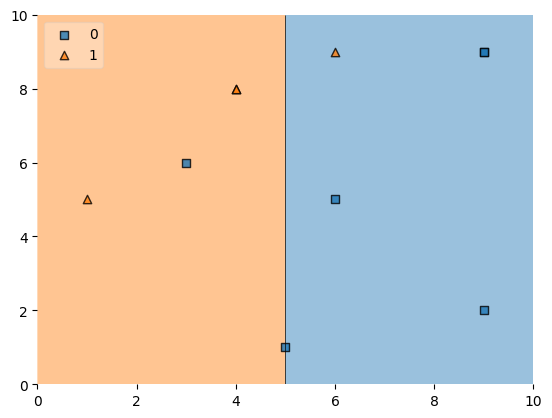

In [91]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [92]:
third_df['y_pred'] = dt3.predict(X)

In [93]:
third_df

,X1,X2,label,y_pred
3,4,8,1,0
5,6,9,1,0
5,6,9,1,1
5,6,9,1,1
6,6,5,0,0
2,3,6,0,0
0,1,5,1,0
5,6,9,1,0
5,6,9,1,1
2,3,6,0,1


In [94]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [95]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


### Prediction

In [96]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [97]:
dt2.predict(query)

array([1])

In [98]:
dt3.predict(query)

array([1])

In [99]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.09861228866811

In [100]:
np.sign(1.09)

1.0

In [101]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [102]:
dt2.predict(query)

array([0])

In [103]:
dt3.predict(query)

array([0])

In [108]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [109]:
np.sign(-0.25)

-1.0